In [47]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics

from urllib.request import urlopen
from urllib.request import Request
import pickle
import re
import html
from collections import Counter
import operator
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from sklearn import tree


#Grabbing data downloaded from UC Irvine's dataset repository
data = pd.read_csv("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/OnlineNewsPopularity.csv")


urls = data["url"]
shares = data[" shares"]
titles = []
print(len(urls))

39644


In [ ]:
#WEBSITE SCRAPER
#Scrapes titles from each URL in the datset WARNING: Takes hours to run
i = 0
for url in urls:
    try:
        req = Request(url)
        response = urlopen(req)
        page = str(response.read())
        match = re.search('<title>(.*?)</title>', page)
        title = match.group(1) if match else "ERROR"
        fixedTitle = html.unescape(title)
        if(i%1000 == 0):
            print(fixedTitle, i)
        i = i + 1
        titles.append(fixedTitle)
    except:
        titles.append("Error")
        
print("ALL DONE")


print("TITLES", titles)
print(len(titles))

with open("titles", 'wb') as f:
    pickle.dump(titles, f)
####################WEB SCRAPE DONE

Amazon's Streaming Video Library Now a Little Easier to Navigate 0
This Is What Little Mark Zuckerberg Looked Like [PIC] 500
iRobot's Medical Robot Gets FDA Approval for Hospital Use 1000
Facebook Campaign Rescues 'Gay Bulldog' From Execution 1500
The Worst Type of YouTube User [SUNDAY COMICS] 2000
Google Music Streaming Rumors and More News You Need to Know 2500
Jeopardy Burns Taylor Swift [PIC]  3000
10 of the Funniest Beer Commercials in the World 3500
High-Speed Police Chase Caught on Helmet Cam 4000
15 Adorable Things That Delight Lil Bub [PICS] 4500
Space Station Crew Returns to Earth Monday: How to Watch Live 5000
Bystander Live-Tweets Brutal London Machete Attack 5500
Why Would-be Marijuana Moguls Have Their Work Cut Out For Them 6000
12 Sketchbooks of the Pros [COMIC] 6500
15 Dead Things on Etsy to Give Your Friends 7000


In [33]:
##READS TITLES FROM PREPROCESSED TITLES
with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/titles", 'rb') as f:
    readTitles = pickle.load(f)
print("LOADED")

LOADED


In [3]:
###########################Organize Weight of Words in terms of shares and sort the dictionary    
titleDict = {}
k = 0
for title in readTitles:
    titleDict[title] = shares[k]
    k = k + 1

finalDict = {}
for title in titleDict:
    split = title.split()
    for word in split:
        finalDict[word] = [0, 0, 0, 0, 0, 0, 0, 0]
        

i = 0
for title in titleDict:
    wordDict = title.split()
    for word in wordDict:
        finalDict[word][0] = finalDict[word][0] + 1
        finalDict[word][1] = finalDict[word][1] + titleDict[title]
        if data[' data_channel_is_lifestyle'][i] == 1:
            finalDict[word][2] = finalDict[word][2] + titleDict[title]
        if data[' data_channel_is_entertainment'][i] == 1:
            finalDict[word][3] = finalDict[word][3] + titleDict[title]
        if data[' data_channel_is_bus'][i] == 1:
            finalDict[word][4] = finalDict[word][4] + titleDict[title]
        if data[' data_channel_is_socmed'][i] == 1:
            finalDict[word][5] = finalDict[word][5] + titleDict[title]
        if data[' data_channel_is_tech'][i] == 1:
            finalDict[word][6] = finalDict[word][6] + titleDict[title]
        if data[' data_channel_is_world'][i] == 1:
            finalDict[word][7] = finalDict[word][7] + titleDict[title]
    i = i + 1

In [4]:
def setup(index):
    fixedDict = {}
    for val in finalDict:
        fixedDict[val] = finalDict[val][index]/finalDict[val][0]
    #Sort
    fixedDict = sorted(fixedDict.items(), key=operator.itemgetter(1))
    fixedDict.reverse()
    #Analysis
    indexString = "Index" + str(index)
    with open(str(indexString), 'wb') as f:
        pickle.dump(fixedDict, f)

for x in range(1, 8):
    setup(x)  





*******************  all
('880', 441000.0)
('Inequality', 309500.0)
('Sucking', 221250.0)
('Lectures', 220166.66666666666)
('Leaked:', 212108.5)
('believing', 211600.0)
('myths', 211600.0)
('Extent', 207066.66666666666)
('suspension', 200100.0)
('overturns', 200100.0)
('Advised', 193400.0)
('McDonalds', 193400.0)
('Wearably', 180600.0)
('Ocho', 161600.0)
("Age,'", 161600.0)
('Aviary,', 161600.0)
('Wealth', 155223.25)
('hires', 142198.8)
('Teenagers', 139600.0)
('$32.5', 139500.0)




*******************  lifestyle
('200-Mile', 111300.0)
('revenues', 69000.0)
('POWs:', 57500.0)
('Commandos', 57500.0)
('Awakens', 50900.0)
("'Almost", 50900.0)
('tops', 50100.0)
('active', 50100.0)
('users,', 50100.0)
('Coca-Cola?', 47800.0)
('Tables,', 42500.0)
('Outgrown', 40000.0)
('All-Muppet', 36200.0)
('Out?', 36100.0)
('Alibaba?', 34800.0)
('bigger', 33400.0)
('likely', 33400.0)
('Pigeons', 28750.0)
('Crashed?', 28300.0)
('Flees', 26550.0)




*******************  entertainment
('Inequality', 30

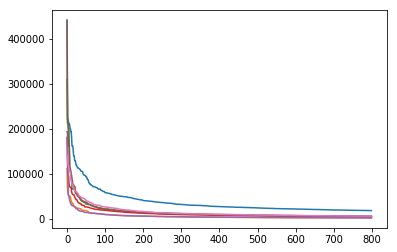

In [5]:
foo = ["", "all", "lifestyle", "entertainment", "business", "medical", "tech", "world"]
analysisDict = {}
def analyze(index):
    indexString = "/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/Index" + str(index)
    with open(indexString, 'rb') as f:
        analysisList = pickle.load(f)
    print()
    print()
    print()
    print()
    print("******************* ", foo[index])
    for i in range(0, 20):
        print(analysisList[i])
    plotList = []
    for i in range(0, 800):
        plotList.append(analysisList[i][1])
    plt.plot(plotList)
    analysisDict[index] = analysisList
    
for g in range(1, 8):
    analyze(g)

In [6]:
#Sum of frequency of all words in title 

def newColumnSetUp(index):
    #Title: A B C
    #F(A) = shares of A
    #Max = top word in All
    #MAX(F(A)/F(MAX), F(B)/F(MAX), F(C)/F(MAX))  
    #Do this for each channell
    #Put all of these in as new columns in my data
    with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/titles", 'rb') as f:
        readTitles = pickle.load(f)
        
    indexString = "Index" + str(index)
    with open(indexString, 'rb') as f:
        analysisDict = pickle.load(f)
    #First value is largest share word. (Dictionary was sorted earlier)
    maxShareWord = analysisDict[0][1]
    newColumn = []
    searchDict = []
    for i in range(0, len(analysisDict)):
        searchDict.append(analysisDict[i][0])
    k = 0
    for title in readTitles:
        if index == 1 or (index == 2 and data[' data_channel_is_lifestyle'][k]) or (index == 3 and data[' data_channel_is_entertainment'][k]) or (index == 4 and data[' data_channel_is_bus'][k]) or (index == 5 and data[' data_channel_is_socmed'][k]) or (index == 6 and data[' data_channel_is_tech'][k]) or (index == 7 and data[' data_channel_is_world'][k]):
            titleShares = data[' shares'][k]
            split = title.split()
            calculatedVal = 0.0
            for word in split:
                indexOfWord = searchDict.index(word)
                if calculatedVal < analysisDict[indexOfWord][1]/maxShareWord - titleShares/maxShareWord:
                    calculatedVal = analysisDict[indexOfWord][1]/maxShareWord - titleShares/maxShareWord
            newColumn.append(calculatedVal) 
        else:
            newColumn.append(0)
        k = k + 1
    columnName = foo[index] + " word prediction"
    data[columnName] = newColumn
    


for g in range(1,8):
    newColumnSetUp(g)
    
with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/FULLCSV", 'wb') as f:
        pickle.dump(data, f)

KeyboardInterrupt: 

In [48]:
with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/FULLCSV", 'rb') as f:
    newData = pickle.load(f)
print("LOADED")

LOADED


In [5]:
#########Size Of Word Analysis##########


wordLengthAnalysis = []
for v in range(0, 40):
    wordLengthAnalysis.append(0)

for i in range(1, 8):
    for word in analysisDict[i]:
        wordLengthAnalysis[len(word[0])] = wordLengthAnalysis[len(word[0])] + word[1]

print(wordLengthAnalysis)
    
removedOutliers = []
for i in range(0, len(wordLengthAnalysis)):
    if wordLengthAnalysis[i] > 1200000:
        removedOutliers.append(wordLengthAnalysis[i])
        
print(removedOutliers)
print("WORD COUNT ANALYSIS")
plt.plot(removedOutliers)



#########Size Of Word Analysis FINISHED#########

NameError: name 'analysisDict' is not defined

In [49]:
########MODEL TESTING###########

popular = data[' shares'] >= 1400
unpopular = data[' shares'] < 1400

data.loc[popular,' shares'] = 1
data.loc[unpopular,' shares'] = 0
score_dt = 0
score_rf = 0
score_nb = 0
numRuns = 10
for i in range(0, numRuns):
    data.sample(frac=1)
    #split original dataset into 60% training and 40% testing
    features=list(data.columns[2:60])
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(data[features], data[' shares'], test_size=0.4, random_state=0)

    x_rest, x_test_part, y_rest, y_test_part= cross_validation.train_test_split(x_test, y_test,
                                                                                test_size=0.6, random_state=0)
    
    decisionTree = DecisionTreeClassifier(min_samples_split=20,random_state=99)
    clf_dt=decisionTree.fit(x_train,y_train)
    newScore = clf_dt.score(x_test_part,y_test_part)
    score_dt=score_dt + newScore

    
    rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
    clf_rf = rf.fit(x_train,y_train)
    newScore = clf_rf.score(x_test_part,y_test_part)
    score_rf=score_rf + newScore
    

    
    nb = BernoulliNB()
    clf_nb=nb.fit(x_train,y_train)
    newScore = clf_nb.score(x_test_part,y_test_part)
    score_nb=score_nb + newScore

score_dt = score_dt/numRuns
score_rf = score_rf/numRuns
score_nb = score_nb/numRuns
print("DecisionTree on Original Data Set")
print("Acurracy: ", score_dt)
print("RandomForest on Original Data Set")
print("Acurracy: ", score_rf)
print("NaiveBayes on Original Data Set")
print("Acurracy: ", score_nb)

print("DONE WITH ORIGINAL DATA")

DecisionTree on Original Data Set
Acurracy:  0.5832895428271152
RandomForest on Original Data Set
Acurracy:  0.6634892275354703
NaiveBayes on Original Data Set
Acurracy:  0.6083026799789807
DONE WITH ORIGINAL DATA


In [50]:
########MODEL TESTING###########

popular = newData[' shares'] >= 1400
unpopular = newData[' shares'] < 1400

newData.loc[popular,' shares'] = 1
newData.loc[unpopular,' shares'] = 0
indices = []
for i in range(2,68):
    if i != 60:
        indices.append(i)
        
score_dt = 0
score_rf = 0
score_nb = 0
numRuns = 10
for i in range(0, numRuns):
    newData.sample(frac=1)
    #split original dataset into 60% training and 40% testing
    features=list(newData.columns[indices])
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(newData[features], newData[' shares'], test_size=0.4, random_state=0)

    x_rest, x_test_part, y_rest, y_test_part= cross_validation.train_test_split(x_test, y_test,
                                                                                test_size=0.6, random_state=0)
    
    decisionTree = DecisionTreeClassifier(min_samples_split=20,random_state=99)
    clf_dt=decisionTree.fit(x_train,y_train)
    newScore = clf_dt.score(x_test_part,y_test_part)
    score_dt=score_dt + newScore

    
    rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
    clf_rf = rf.fit(x_train,y_train)
    newScore = clf_rf.score(x_test_part,y_test_part)
    score_rf=score_rf + newScore
    

    
    nb = BernoulliNB()
    clf_nb=nb.fit(x_train,y_train)
    newScore = clf_nb.score(x_test_part,y_test_part)
    score_nb=score_nb + newScore

score_dt = score_dt/numRuns
score_rf = score_rf/numRuns
score_nb = score_nb/numRuns
print("DecisionTree on New Data Set")
print("Acurracy: ", score_dt)
print("RandomForest on New Data Set")
print("Acurracy: ", score_rf)
print("NaiveBayes on New Data Set")
print("Acurracy: ", score_nb)

print("DONE WITH NEW DATA")
##########MODEL TESTING FINISHED############

DecisionTree on New Data Set
Acurracy:  0.733893851812927
RandomForest on New Data Set
Acurracy:  0.7851287440882817
NaiveBayes on New Data Set
Acurracy:  0.702679978980557
DONE WITH NEW DATA


In [68]:
with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/FULLCSV", 'rb') as f:
    newData = pickle.load(f)
print("LOADED")

LOADED


In [69]:
##Part of Speech
##New feature for each part of speech and boolean of whether it has that part of speech or not.
import nltk as nltk
coordinatingConjunctions = []
cardinalDigits = []
determiners = []
existentialTheres = []
foreignWords = []
prepositions = []
bigAdjectives = []
biggerAdjectives = []
biggestAdjectives = []
listMarkers = []
modals = []
singleNouns = []
pluralNouns = []
properNouns = []
pluralProperNouns = []
predeterminers = []
possesives = []
personalPronouns = []
possesivePronouns = []
adverbs = []
comparitiveAdverbs = []
superlativeAdverbs = []
particles = []
toBe = []
interjections = []
verbs = []
gerundVerbs = []
pastVerbs = []
pastParticipleVerbs = []
presentVerbs = []
verbs3rdPerson = []
whDeterminers = []
whPronouns = []
whPossesives = []
whAdverbs = []

In [70]:
for title in readTitles:
    tokenized = nltk.word_tokenize(title)
    partsOfSpeech = nltk.pos_tag(tokenized)
    tokens = []
    for token in partsOfSpeech:
        tokens.append(token[1])
    if "CC" in tokens:
        coordinatingConjunctions.append(1)
    else:
        coordinatingConjunctions.append(0)
    if "CD" in tokens:
        cardinalDigits.append(1)
    else:
        cardinalDigits.append(0)
    if "DT" in tokens:
        determiners.append(1)
    else:
        determiners.append(0)
    if "EX" in tokens:
        existentialTheres.append(1)
    else:
        existentialTheres.append(0)
    if "FW" in tokens:
        foreignWords.append(1)
    else:
        foreignWords.append(0)
    if "IN" in tokens:
        prepositions.append(1)
    else:
        prepositions.append(0)
    if "JJ" in tokens:
        bigAdjectives.append(1)
    else:
        bigAdjectives.append(0)
    if "JJR" in tokens:
        biggerAdjectives.append(1)
    else:
        biggerAdjectives.append(0)
    if "JJS" in tokens:
        biggestAdjectives.append(1)
    else:
        biggestAdjectives.append(0)
    if "LS" in tokens:
        listMarkers.append(1)
    else:
        listMarkers.append(0)
    if "MD" in tokens:
        modals.append(1)
    else:
        modals.append(0)
    if "NN" in tokens:
        singleNouns.append(1)
    else:
        singleNouns.append(0)
    if "NNS" in tokens:
        pluralNouns.append(1)
    else:
        pluralNouns.append(0)
    if "NNP" in tokens:
        properNouns.append(1)
    else:
        properNouns.append(0)
    if "NNPS" in tokens:
        pluralProperNouns.append(1)
    else:
        pluralProperNouns.append(0)
    if "PDT" in tokens:
        predeterminers.append(1)
    else:
        predeterminers.append(0)
    if "POS" in tokens:
        possesives.append(1)
    else:
        possesives.append(0)
    if "PRP" in tokens:
        personalPronouns.append(1)
    else:
        personalPronouns.append(0)
    if "PRP$" in tokens:
        possesivePronouns.append(1)
    else:
        possesivePronouns.append(0)
    if "RB" in tokens:
        adverbs.append(1)
    else:
        adverbs.append(0)
    if "RBR" in tokens:
        comparitiveAdverbs.append(1)
    else:
        comparitiveAdverbs.append(0)
    if "RBS" in tokens:
        superlativeAdverbs.append(1)
    else:
        superlativeAdverbs.append(0)
    if "RP" in tokens:
        particles.append(1)
    else:
        particles.append(0)
    if "TO" in tokens:
        toBe.append(1)
    else:
        toBe.append(0)
    if "UH" in tokens:
        interjections.append(1)
    else:
        interjections.append(0)
    if "VB" in tokens:
        verbs.append(1)
    else:
        verbs.append(0)
    if "VBD" in tokens:
        pastVerbs.append(1)
    else:
        pastVerbs.append(0)
    if "VBG" in tokens:
        gerundVerbs.append(1)
    else:
        gerundVerbs.append(0)
    if "VBN" in tokens:
        pastParticipleVerbs.append(1)
    else:
        pastParticipleVerbs.append(0)
    if "VBP" in tokens:
        presentVerbs.append(1)
    else:
        presentVerbs.append(0)
    if "VBZ" in tokens:
        verbs3rdPerson.append(1)
    else:
        verbs3rdPerson.append(0)
    if "WDT" in tokens:
        whDeterminers.append(1)
    else:
        whDeterminers.append(0)
    if "WP" in tokens:
        whPronouns.append(1)
    else:
        whPronouns.append(0)
    if "WP$" in tokens:
        whPossesives.append(1)
    else:
        whPossesives.append(0)
    if "WRB" in tokens:
        whAdverbs.append(1)
    else:
        whAdverbs.append(0)
print(len(whAdverbs))

39644


In [71]:
columnName = "coordinatingConjunctions"
newData[columnName] = coordinatingConjunctions
columnName = "cardinalDigits"
newData[columnName] = cardinalDigits
columnName = "determiners"
newData[columnName] = determiners
columnName = "existentialTheres"
newData[columnName] = existentialTheres
columnName = "foreignWords"
newData[columnName] = foreignWords
columnName = "prepositions"
newData[columnName] = prepositions
columnName = "bigAdjectives"
newData[columnName] = bigAdjectives
columnName = "biggerAdjectives"
newData[columnName] = biggerAdjectives
columnName = "biggestAdjectives"
newData[columnName] = biggestAdjectives
columnName = "listMarkers"
newData[columnName] = listMarkers
columnName = "modals"
newData[columnName] = modals
columnName = "singleNouns"
newData[columnName] = singleNouns
columnName = "pluralNouns"
newData[columnName] = pluralNouns
columnName = "properNouns"
newData[columnName] = properNouns
columnName = "pluralProperNouns"
newData[columnName] = pluralProperNouns
columnName = "predeterminers"
newData[columnName] = predeterminers
columnName = "possesives"
newData[columnName] = possesives
columnName = "personalPronouns"
newData[columnName] = personalPronouns
columnName = "possesivePronouns"
newData[columnName] = possesivePronouns
columnName = "adverbs"
newData[columnName] = adverbs
columnName = "comparitiveAdverbs"
newData[columnName] = comparitiveAdverbs
columnName = "superlativeAdverbs"
newData[columnName] = superlativeAdverbs
columnName = "particles"
newData[columnName] = particles
columnName = "toBe"
newData[columnName] = toBe
columnName = "interjections"
newData[columnName] = interjections
columnName = "verbs"
newData[columnName] = verbs
columnName = "gerundVerbs"
newData[columnName] = gerundVerbs
columnName = "pastVerbs"
newData[columnName] = pastVerbs
columnName = "presentVerbs"
newData[columnName] = presentVerbs
columnName = "verbs3rdPerson"
newData[columnName] = verbs3rdPerson
columnName = "whDeterminers"
newData[columnName] = whDeterminers
columnName = "whPronouns"
newData[columnName] = whPronouns
columnName = "whPossesives"
newData[columnName] = whPossesives
columnName = "whAdverbs"
newData[columnName] = whAdverbs
##Is title a question?####
newColumn = []
for title in readTitles:
    if '?' in title:
        newColumn.append(1)
    else:
        newColumn.append(0)
columnName = "IsItAQuestion?"
newData[columnName] = newColumn

In [72]:
########MODEL TESTING###########

popular = newData[' shares'] >= 1400
unpopular = newData[' shares'] < 1400

newData.loc[popular,' shares'] = 1
newData.loc[unpopular,' shares'] = 0
print(len(newData.columns))
for i in range(2,103):
    if i != 60:
        indices.append(i)
        
score_dt = 0
score_rf = 0
score_nb = 0
numRuns = 10
for i in range(0, numRuns):
    newData.sample(frac=1)
    #split original dataset into 60% training and 40% testing
    features=list(newData.columns[indices])
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(newData[features], newData[' shares'], test_size=0.2, random_state=0)

    x_rest, x_test_part, y_rest, y_test_part= cross_validation.train_test_split(x_test, y_test,
                                                                                test_size=0.8, random_state=0)
    
    decisionTree = DecisionTreeClassifier(min_samples_split=20,random_state=99)
    clf_dt=decisionTree.fit(x_train,y_train)
    newScore = clf_dt.score(x_test_part,y_test_part)
    score_dt=score_dt + newScore

    
    rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
    clf_rf = rf.fit(x_train,y_train)
    newScore = clf_rf.score(x_test_part,y_test_part)
    score_rf=score_rf + newScore
    

    
    nb = BernoulliNB()
    clf_nb=nb.fit(x_train,y_train)
    newScore = clf_nb.score(x_test_part,y_test_part)
    score_nb=score_nb + newScore

score_dt = score_dt/numRuns
score_rf = score_rf/numRuns
score_nb = score_nb/numRuns
print("DecisionTree on Parts Of Speech Data Set")
print("Acurracy: ", score_dt)
print("RandomForest on Parts of Speech Data Set")
print("Acurracy: ", score_rf)
print("NaiveBayes on Parts of Speech Data Set")
print("Acurracy: ", score_nb)

print("DONE WITH Parts Of Speech DATA")
##########MODEL TESTING FINISHED############

103
DecisionTree on Parts Of Speech Data Set
Acurracy:  0.7484237074401009
RandomForest on Parts of Speech Data Set
Acurracy:  0.7988335435056746
NaiveBayes on Parts of Speech Data Set
Acurracy:  0.712484237074401
DONE WITH Parts Of Speech DATA


In [73]:
with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/FULLCSV", 'rb') as f:
    newData = pickle.load(f)
print("LOADED")

LOADED


In [74]:
##Word Embeddings################
from gensim.models import Word2Vec
import numpy as np

sentences = []
for title in readTitles:
    newSentence = []
    for word in title.split():
        newSentence.append(word)
    sentences.append(newSentence)

print(sentences[0])
print(len(sentences))

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


["Amazon's", 'Streaming', 'Video', 'Library', 'Now', 'a', 'Little', 'Easier', 'to', 'Navigate']
39644


In [75]:
model = Word2Vec(sentences, min_count=1)
print(model)
words = list(model.wv.vocab)
# print(words)
print(model['Streaming'])

Word2Vec(vocab=44258, size=100, alpha=0.025)
[ 0.34276783  0.46069226 -0.16278662 -0.16949683  0.22781396  0.61216336
 -0.09008636  0.04603339  0.17321911 -0.09875596 -0.23456736 -0.17230874
  0.3110582  -0.3687816   0.12025033  0.0223255   0.03771744  0.24812336
 -0.09969793 -0.35040304 -0.6068585  -0.06685096  0.0788237   0.39716873
  0.08661266  0.4342817   0.21720888  0.2909831   0.30601093 -0.44079024
  0.38317132  0.09469972  0.07694181 -0.45059064  0.3726229   0.11208489
  0.4350454   0.09683706 -0.3045633   0.27395815  0.31626284  0.2387609
  0.01654872 -0.12610699 -0.25478745 -0.08348373 -0.32510683 -0.452502
  0.2597069  -0.37114    -0.06528524 -0.0764733   0.04796081 -0.04082907
 -0.06830652 -0.48895198 -0.09660547  0.02120616  0.13412653  0.3704928
 -0.44822082  0.17172104 -0.29963487 -0.3548699  -0.11822192  0.34526187
 -0.12054364  0.09974688 -0.2351686  -0.47744402  0.32261613  0.21066917
 -0.12642547  0.16821691 -0.45494872  0.21937929 -0.05528766  0.58340436
 -0.336886

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [76]:
with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/FULLCSV", 'rb') as f:
    newData = pickle.load(f)
print("LOADED")

LOADED


In [77]:
#sum all vectors of words in each title divide by number of words take all values in vector and add each to new feature
#adding vectors is simple addition and divison
newVectors = []
for title in readTitles:
    newVector = []
    for i in range(0,100):
        sum = 0;
        for word in title.split():
            sum = sum + model[word][i]
        newVector.append(sum/len(title.split()))
    newVectors.append(newVector)
print("DONE MAKING VECTORS")

for colIndex in range(0,100):
    newColumn = []
    columnName = "WordEmbeddings"+str(colIndex)
    for vector in newVectors: 
        newColumn.append(vector[i])
    newData[columnName] = newColumn
    
print(newData["WordEmbeddings35"])
with open("/Users/kaimcconnell/Whitman Spring 2019/Advanced Project/BuzzWordCalculator-master/DataMiningFinalProject/WORDEMBEDDINGSCSV", 'wb') as f:
        pickle.dump(newData, f)
# print(data[columnName][10])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


DONE MAKING VECTORS
0       -0.893495
1       -0.761654
2       -0.738610
3       -0.791363
4       -1.198846
5       -0.938808
6       -0.671144
7       -1.094782
8       -0.889075
9       -0.462816
10      -0.942319
11      -0.811234
12      -0.861432
13      -0.746236
14      -0.587047
15      -0.735157
16      -1.098821
17      -1.270627
18      -1.411164
19      -0.930544
20      -1.098097
21      -0.535460
22      -0.616810
23      -0.674164
24      -0.597284
25      -0.547977
26      -0.459846
27      -1.003859
28      -1.229597
29      -1.140541
           ...   
39614   -0.880668
39615   -0.877733
39616   -0.590425
39617   -0.634233
39618   -0.170875
39619   -0.517786
39620   -0.516453
39621   -0.317207
39622   -0.843900
39623   -1.067456
39624   -0.277822
39625   -0.527363
39626   -0.705442
39627   -0.296848
39628   -0.673005
39629   -0.433405
39630   -0.516598
39631   -0.523961
39632   -0.488026
39633   -0.637971
39634   -0.748643
39635   -0.652857
39636   -0.559535
39637   

In [78]:
########MODEL TESTING###########

popular = newData[' shares'] >= 1400
unpopular = newData[' shares'] < 1400

newData.loc[popular,' shares'] = 1
newData.loc[unpopular,' shares'] = 0
for i in range(2,len(newData.columns)):
    if i != 60:
        indices.append(i)
score_dt = 0
score_rf = 0
score_nb = 0
numRuns = 10
for i in range(0, numRuns):
    newData.sample(frac=1)
    #split original dataset into 60% training and 40% testing
    features=list(newData.columns[indices])
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(newData[features], newData[' shares'], test_size=0.2, random_state=0)

    x_rest, x_test_part, y_rest, y_test_part= cross_validation.train_test_split(x_test, y_test,
                                                                                test_size=0.8, random_state=0)
    
    decisionTree = DecisionTreeClassifier(min_samples_split=20,random_state=99)
    clf_dt=decisionTree.fit(x_train,y_train)
    newScore = clf_dt.score(x_test_part,y_test_part)
    score_dt=score_dt + newScore

    
    rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
    clf_rf = rf.fit(x_train,y_train)
    newScore = clf_rf.score(x_test_part,y_test_part)
    score_rf=score_rf + newScore
    

    
    nb = BernoulliNB()
    clf_nb=nb.fit(x_train,y_train)
    newScore = clf_nb.score(x_test_part,y_test_part)
    score_nb=score_nb + newScore

score_dt = score_dt/numRuns
score_rf = score_rf/numRuns
score_nb = score_nb/numRuns
print("DecisionTree on Word Embeddings Data Set")
print("Acurracy: ", score_dt)
print("RandomForest on Word Embeddings Data Set")
print("Acurracy: ", score_rf)
print("NaiveBayes on Word Embeddings Data Set")
print("Acurracy: ", score_nb)

print("DONE WITH Word Embeddings DATA")
##########MODEL TESTING FINISHED############

DecisionTree on Word Embeddings Data Set
Acurracy:  0.7411727616645649
RandomForest on Word Embeddings Data Set
Acurracy:  0.7970523329129886
NaiveBayes on Word Embeddings Data Set
Acurracy:  0.711065573770492
DONE WITH Word Embeddings DATA
